## Linear Regression

In [9]:
# importing the dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
# data pre processing

linreg = pd.read_csv('/content/data.csv')

In [11]:
linreg.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [12]:
linreg.tail()

,Height,Weight
10,1.73,66.28
11,1.75,68.10
12,1.78,69.92
13,1.80,72.19
14,1.83,74.46


In [13]:
linreg.shape

(15, 2)

In [14]:
linreg.isnull().sum()

Height    0
Weight    0
dtype: int64

In [21]:
X=linreg.iloc[:,:-1].values
Y=linreg.iloc[:,1].values

X = np.array(X)
Y = np.array(Y)

In [22]:
print(X)

[[1.47]
 [1.5 ]
 [1.52]
 [1.55]
 [1.57]
 [1.6 ]
 [1.63]
 [1.65]
 [1.68]
 [1.7 ]
 [1.73]
 [1.75]
 [1.78]
 [1.8 ]
 [1.83]]


In [23]:
print(Y)

[52.21 53.12 54.48 55.84 57.2  58.57 59.93 61.29 63.11 64.47 66.28 68.1
 69.92 72.19 74.46]


In [43]:
# usually we normalise the independent data to avoid high range variation in values so

#u = X.mean()
#s = X.std()
#X = (X - u)/s
#print(X)

In [44]:
# splitting the dataset into train data and test data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [45]:
# Linear Regression

class Linear_Regression():
  def __init__(self, learning_rate, epochs):
    self.learning_rate = learning_rate
    self.epochs = epochs

  # fit function to train the model
  def fit(self, X, Y):
    # no. of training examples
    self.m,self.n = X.shape
    # initializing weights and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y
    # implementing gradient descent for optimization
    for i in range(self.epochs):
      self.update_weights()

  def update_weights(self):
    Y_prediction=self.predict(self.X)
    #calculate gradients
    dw = -( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
    db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
     # updating the weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db
# Line function for prediction:      
  def predict( self, X ) :
      return X.dot( self.w ) + self.b
    

In [46]:
model = Linear_Regression(learning_rate=0.22, epochs=200)

In [47]:
model.fit(X_train,Y_train)

In [48]:
# printing the parameter values

print("weight : ", model.w[0])
print("bias : ", model.b)

weight :  6.810216551515246
bias :  62.05297749432765


In [49]:
test_data_predict = model.predict(X_test)

In [50]:
print(test_data_predict)

[70.03394738 57.07515607 52.75555896]


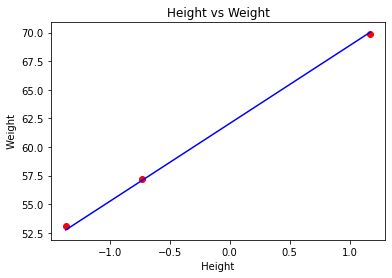

In [51]:
# data visualization btwn actual and predicted Y values

plt.scatter(X_test, Y_test, color='r')
plt.plot(X_test,test_data_predict, color='b')
plt.xlabel(' Height ')
plt.ylabel(' Weight ')
plt.title('Height vs Weight')
plt.show()